In [939]:
%matplotlib inline
import random
import matplotlib.pyplot as plt
import numpy as np
import math
from collections import Counter

def get_deck(ncards, quiet=False):
    cards = []
    for x in xrange(1,ncards+1):
        cards.extend([x]*4)
    ## Add face cards, value is one half of max
    cards += [int(math.ceil(ncards/2.))]*12
    
    if not quiet:
        print("Deck {}".format(cards))
    return cards    

def play_one_round(dealer_initial=1, ncards=10, quiet=True):
    ## Initialize card deck
    cards = get_deck(ncards=ncards, quiet=quiet)
    player = random.choice(xrange(1,ncards+1))
    ## diff btw player and dealer
    difference = player - dealer_initial
    random.shuffle(cards)
    if not quiet:
        print("player chose {}".format(player))
        print(cards)
    totcards = list(cards)

    diffs_through_time = []
    steps = 0
    while True:

        ## We're done
        if difference == 0:
            break

        try:
            x = totcards[0]
        except Exception:
            ## Ran out of cards
            break
        if not quiet:
            if difference > 0:
                dealer = x
                player = totcards[difference]
            else:
                player = x
                dealer = totcards[abs(difference)]
            print("step {} diff {} dealer {} player {}".format(steps, difference, dealer, player)),
            print(totcards)

        ## Remove the right number of cards
        ## If difference is bigger than x then who is behind doens't
        ## change, so just remove x number of cards
        if abs(difference) >= x:
            totcards = totcards[x:]
        elif abs(difference) < x:
            #remove_cards = x - abs(difference)
            #totcards = totcards[remove_cards:]
            totcards = totcards[abs(difference):]
        
        ## Move the pointer
        if difference > 0:
            difference -= x
        elif difference < 0:
            difference += x

        ## If whoever is behind will overflow the deck on the next move then you're
        ## of cards, so quit.
        try:
            totcards[abs(difference)]
        except IndexError:
            break

        if not quiet:
            if difference > 0:
                dealer = totcards[0]
                player = totcards[difference]
            else:
                player = totcards[0]
                dealer = totcards[abs(difference)]
            print("step {} diff {} dealer {} player {}".format(steps, difference, dealer, player)),
            print(totcards)
        steps += 1
        diffs_through_time.append(difference)
    if not totcards and not quiet:
        print("ran out of cards")
        
    return player, difference, steps, diffs_through_time

In [940]:
## Play many rounds and keep track of nsteps
counts_per_choice = {}
for x in xrange(1,11):
    counts_per_choice[x] = Counter()

nsims = 100000
for step in xrange(nsims):
    choice, difference, steps, _ = play_one_round()
    #print(choice, difference, steps)
    counts_per_choice[choice].update([steps])
    
    ## Didn't converge
    if difference:
        counts_per_choice[choice].update([-1])
#print(counts_per_choice)
#plt.hist(counts, bins=30)


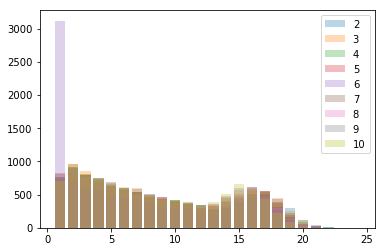

In [941]:
for x in xrange(2,11):
    labels, values = zip(*counts_per_choice[x].items())
    ## -1 drops the last list elements because we're dropping the '-1' case to plot specially
    plt.bar(labels[:-1], values[:-1], alpha=0.3, label=x)
    #print(counts_per_choice[x].items())
plt.legend()


start, totsims, nfailed, fraction
(2, 11655, 1554, 0.13333333333333333)
(3, 11556, 1543, 0.13352371062651436)
(4, 11482, 1622, 0.14126458805086223)
(5, 11764, 1687, 0.14340360421625298)
(6, 11287, 1263, 0.11189864445822628)
(7, 11558, 1661, 0.14370998442637134)
(8, 11571, 1682, 0.14536340852130325)
(9, 11644, 1750, 0.15029199587770525)
(10, 12093, 1882, 0.155627222360043)
Fraction of sims that never converge 0.14644


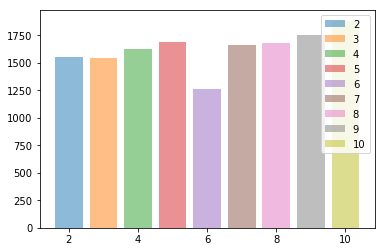

In [1026]:
## Number of times it got all the way through the deck without converging
## Its also interesting that different starting values do or don't converge as much
## TODO
total = 0
print("start, totsims, nfailed, fraction")
for x in xrange(2,11):
    num = counts_per_choice[x][-1]
    totsims = sum(counts_per_choice[x].values())
    print(x, totsims, num, float(num)/totsims)
    total += num
    plt.bar(x, num, alpha=0.5, label=x)
plt.legend()
print("Fraction of sims that never converge {}".format(total/float(nsims)))
#    labels, values = zip(*counts_per_choice[x].items())
#    mean = np.mean(np.array(labels) * np.array(values))


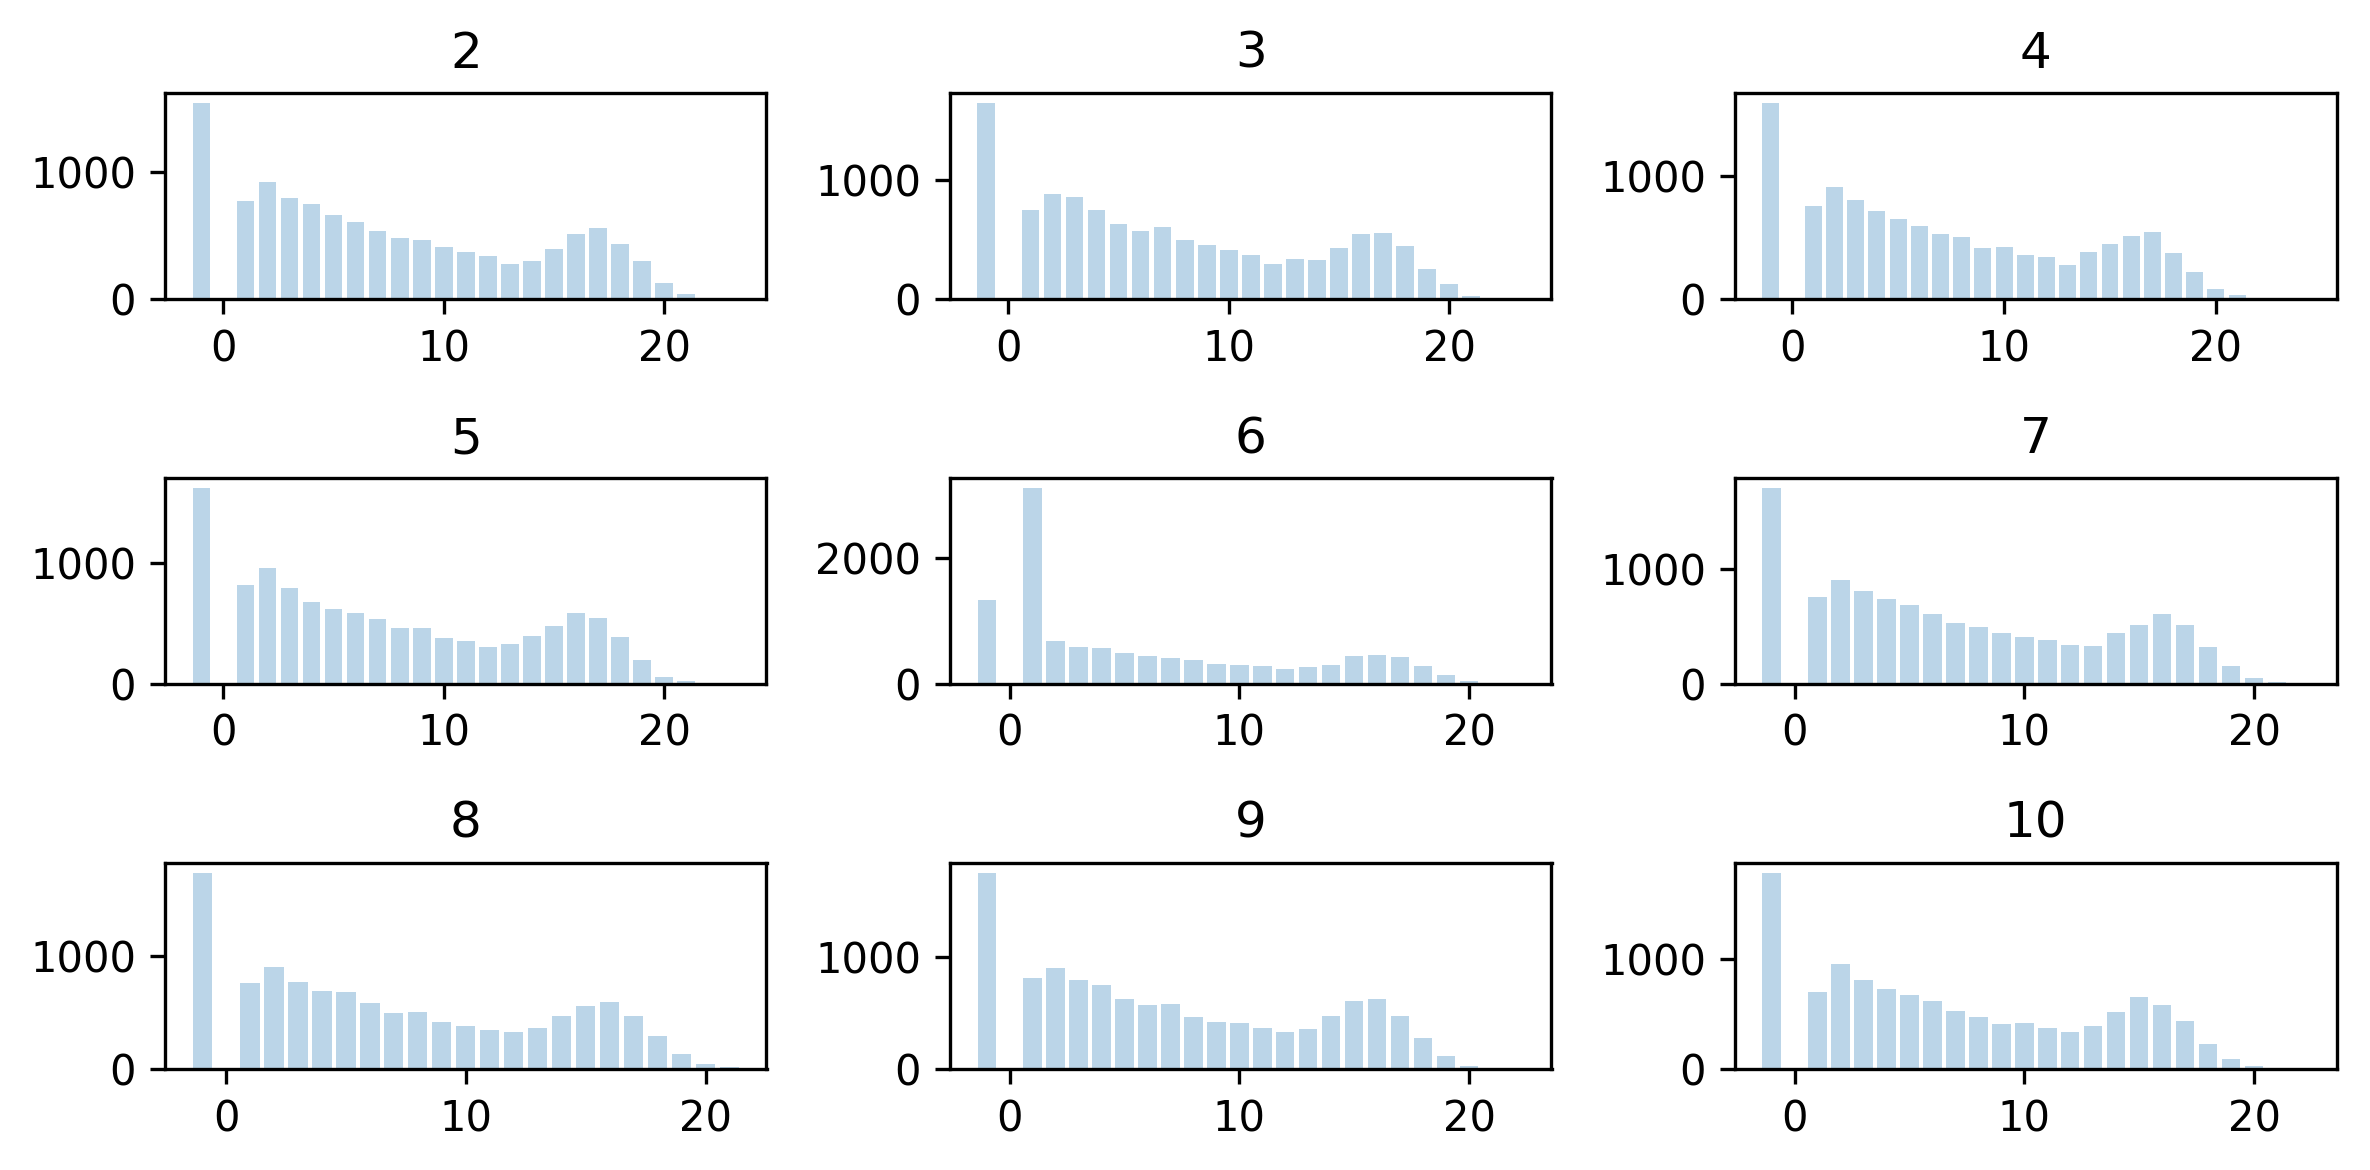

In [943]:
## Look at each individually
f, axarr = plt.subplots(3, 3, figsize=(8,4), dpi=300)
axarr = [a for b in axarr for a in b]
for x, ax in zip(xrange(2, 11), axarr):
    labels, values = zip(*counts_per_choice[x].items())
    ax.bar(labels, values, alpha=0.3, label=x)
    ax.set_title(x)
plt.tight_layout()


## Look closer at everything _but_ 6, since it's an outlier

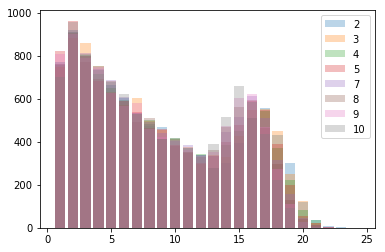

In [944]:
for x in xrange(2,11):
    if x == 6:
        continue
    labels, values = zip(*counts_per_choice[x].items())
    ## -1 drops the last list elements because we're dropping the '-1' case to plot specially
    plt.bar(labels[:-1], values[:-1], alpha=0.3, label=x)
    #print(counts_per_choice[x].items())
plt.legend()


# Can we figure out why the bimodality?

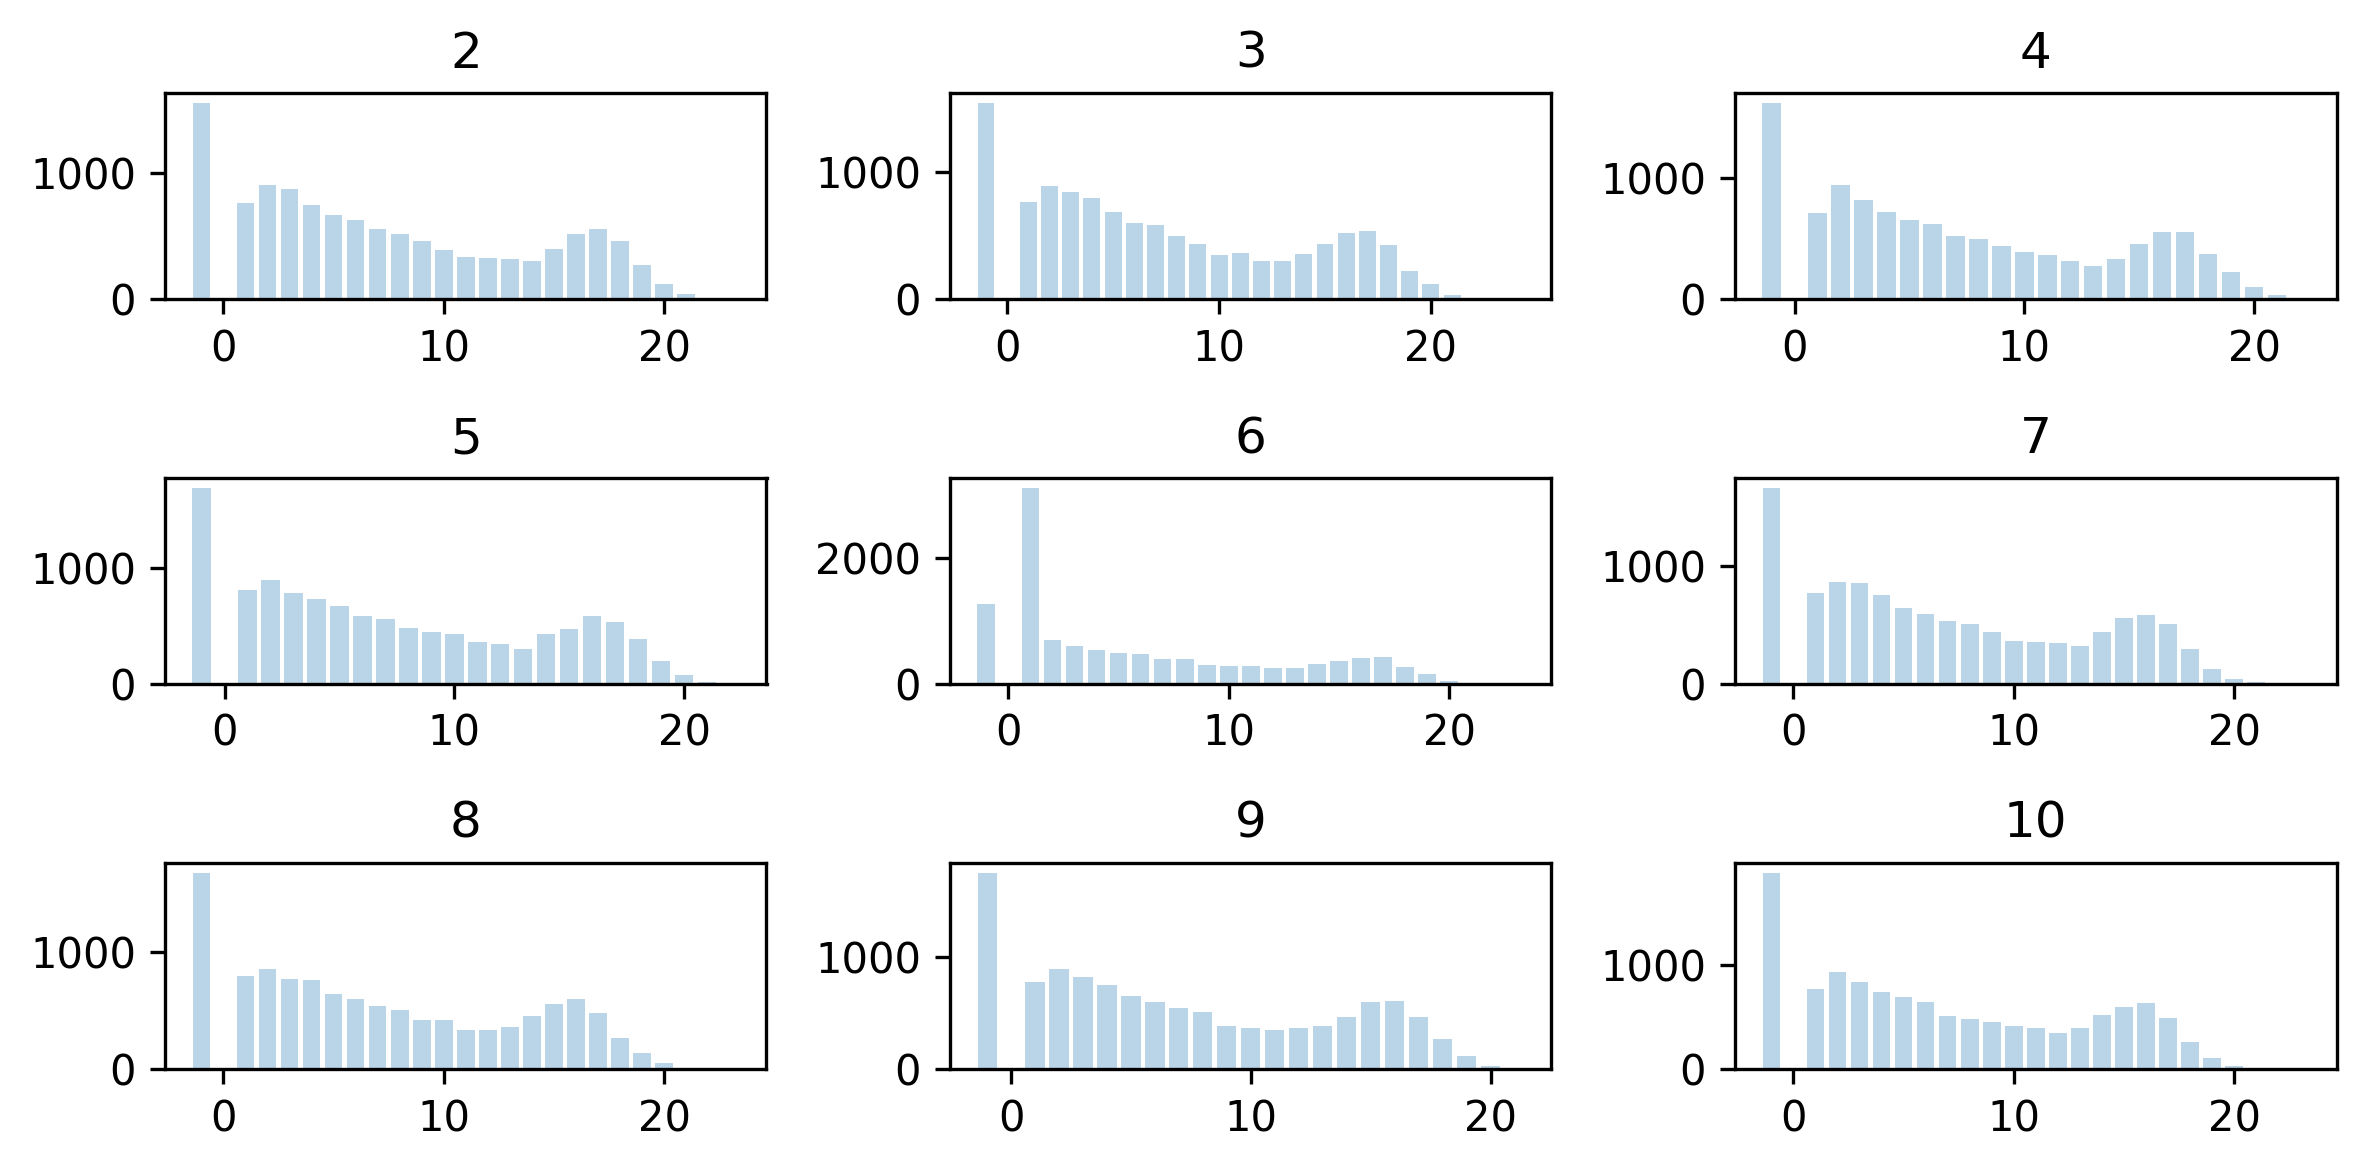

In [981]:
## Play many rounds and keep track of nsteps
counts_per_choice = {}
diffs_through_time_dict = {}
for x in xrange(1,11):
    counts_per_choice[x] = Counter()
    diffs_through_time_dict[x] = []

nsims = 100000
for step in xrange(nsims):
    choice, difference, steps, diffs_through_time = play_one_round()
    counts_per_choice[choice].update([steps])
    diffs_through_time_dict[choice].append(diffs_through_time)
    
    ## Didn't converge
    if difference:
        counts_per_choice[choice].update([-1])
#print(counts_per_choice)
#plt.hist(counts, bins=30)
## Look at each individually
f, axarr = plt.subplots(3, 3, figsize=(8,4), dpi=300)
axarr = [a for b in axarr for a in b]
for x, ax in zip(xrange(2, 11), axarr):
    labels, values = zip(*counts_per_choice[x].items())
    ax.bar(labels, values, alpha=0.3, label=x)
    ax.set_title(x)
plt.tight_layout()



init 1
nan
nan
nan
(0, 0, 0)
init 2
2.39432703003
3.24362895005
3.443359375
(899, 327, 512)
init 3
2.21820728291
3.21752549651
3.40359042553
(1785, 621, 1034)
init 4
2.06472313898
3.18095748482
3.38351197982
(2727, 933, 1586)
init 5
1.93960751797
3.1478515625
3.36232134624
(3618, 1280, 2169)
init 6
1.88952005565
3.14336389435
3.34952894328
(4313, 1527, 2574)
init 7
1.80765513242
3.13841354724
3.33067389927
(5173, 1870, 3157)
init 8
1.78089235362
3.13557721366
3.32462413518
(6029, 2206, 3758)
init 9
1.78631305102
3.14405735046
3.32295965154
(6919, 2569, 4362)
init 10
1.82700878645
3.15101304945
3.32094019235
(7853, 2912, 4991)


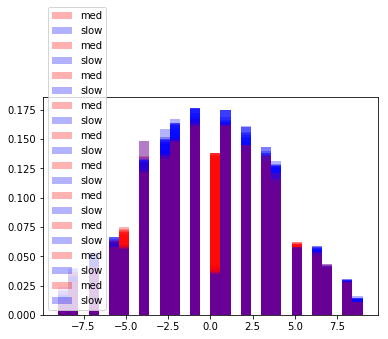

In [1029]:
## Useless also
fast = []
medium = []
slow = []
for i in xrange(1, 11):
#for i in [2,3,4,5]:
    print("init {}".format(i))
    for x in diffs_through_time_dict[i]:
        if len(x) == 2:
            fast.append(x)
        elif len(x) == 12:
            medium.append(x)
        elif len(x) == 16:
            slow.append(x)
    print(np.mean([np.mean(np.abs(x)) for x in fast]))
    print(np.mean([np.mean(np.abs(x)) for x in medium]))
    print(np.mean([np.mean(np.abs(x)) for x in slow]))
    print(len(fast), len(medium), len(slow))
    #plt.hist([x for y in fast for x in y], bins=30, alpha=.3, label="fast", normed=True)
    plt.hist([x for y in medium for x in y], bins=30, alpha=.3, label="med", normed=True, color="r")
    plt.hist([x for y in slow for x in y], bins=30, alpha=.3, label="slow", normed=True, color="b")
    plt.legend()

In [982]:
## This is useless I think
#print(diffs_through_time_dict[2])
print(diffs_through_time_dict[2][0])
for x in xrange(2, 11):
    print(x),
    print(np.mean([np.mean(np.abs(x)) for x in diffs_through_time_dict[x]]))

[-4, 3, 0]
2 2.86015897496
3 2.71485708483
4 2.64056151933
5 2.55654420085
6 1.91463721769
7 2.52351521043
8 2.57657316365
9 2.64403150075
10 2.74435096483


# Using different deck sizes

(2, 5)
(3, 5)
Fraction of sims that never converge 0.0001


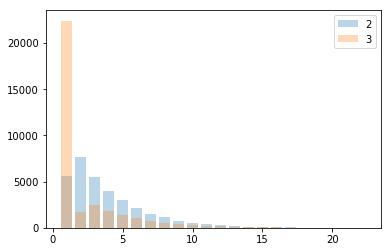

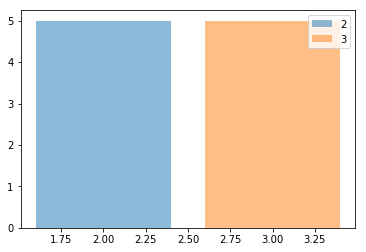

In [945]:
## Lets look at the results for a deck with only 3 number cards
## Play many rounds and keep track of nsteps
ncards = 3
counts_per_choice = {}
for x in xrange(1,ncards+1):
    counts_per_choice[x] = Counter()

nsims = 100000
for step in xrange(nsims):
    choice, difference, steps, _ = play_one_round(ncards=ncards)
    #print(choice, difference, steps)
    counts_per_choice[choice].update([steps])
    
    ## Didn't converge
    if difference:
        counts_per_choice[choice].update([-1])
for x in xrange(2,ncards+1):
    labels, values = zip(*counts_per_choice[x].items())
    ## -1 drops the last list elements because we're dropping the '-1' case to plot specially
    plt.bar(labels[:-1], values[:-1], alpha=0.3, label=x)
    #print(counts_per_choice[x].items())
plt.legend()

plt.figure()
## Number of times it got all the way through the deck without converging
tot = 0
for x in xrange(2,ncards+1):
    num = counts_per_choice[x][-1]
    print(x, num)
    tot += num
    plt.bar(x, num, alpha=0.5, label=x)
plt.legend()
print("Fraction of sims that never converge {}".format(tot/float(nsims)))
#    labels, values = zip(*counts_per_choice[x].items())
#    mean = np.mean(np.array(labels) * np.array(values))



## What if the dealer starts at a number other than 1

(2, 1521)
(3, 0)
(4, 1554)
(5, 1615)
(6, 1621)
(7, 1617)
(8, 1284)
(9, 1823)
(10, 1803)
Fraction of sims that never converge 0.12838


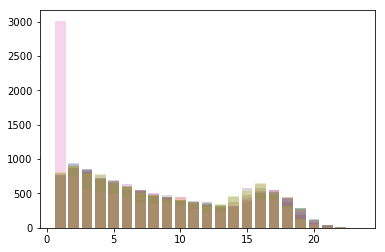

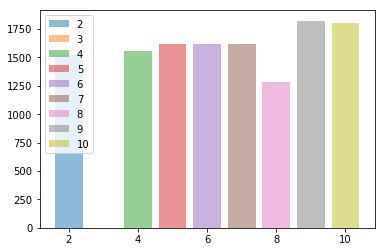

In [946]:
## Play many rounds and keep track of nsteps
ncards = 10
counts_per_choice = {}
for x in xrange(1,ncards+1):
    counts_per_choice[x] = Counter()

nsims = 100000
for step in xrange(nsims):
    choice, difference, steps, _ = play_one_round(ncards=ncards, dealer_initial=3)
    #print(choice, difference, steps)
    counts_per_choice[choice].update([steps])
    
    ## Didn't converge
    if difference:
        counts_per_choice[choice].update([-1])
for x in xrange(2,ncards+1):
    labels, values = zip(*counts_per_choice[x].items())
    ## -1 drops the last list elements because we're dropping the '-1' case to plot specially
    plt.bar(labels[:-1], values[:-1], alpha=0.3, label=x)
    #print(counts_per_choice[x].items())
#plt.legend()

plt.figure()
## Number of times it got all the way through the deck without converging
tot = 0
for x in xrange(2,ncards+1):
    num = counts_per_choice[x][-1]
    print(x, num)
    tot += num
    plt.bar(x, num, alpha=0.5, label=x)
plt.legend()
print("Fraction of sims that never converge {}".format(tot/float(nsims)))
#    labels, values = zip(*counts_per_choice[x].items())
#    mean = np.mean(np.array(labels) * np.array(values))



In [947]:
play_one_round(quiet=False)

Deck [1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 8, 9, 9, 9, 9, 10, 10, 10, 10, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
player chose 5
[9, 8, 7, 6, 6, 5, 5, 10, 5, 2, 5, 5, 5, 5, 4, 2, 5, 10, 10, 10, 8, 5, 1, 8, 3, 2, 6, 5, 4, 6, 3, 9, 7, 5, 5, 4, 1, 9, 5, 5, 3, 4, 5, 2, 8, 5, 7, 1, 3, 7, 1, 9]
step 0 diff 4 dealer 9 player 6 [9, 8, 7, 6, 6, 5, 5, 10, 5, 2, 5, 5, 5, 5, 4, 2, 5, 10, 10, 10, 8, 5, 1, 8, 3, 2, 6, 5, 4, 6, 3, 9, 7, 5, 5, 4, 1, 9, 5, 5, 3, 4, 5, 2, 8, 5, 7, 1, 3, 7, 1, 9]
step 0 diff -5 dealer 2 player 6 [6, 5, 5, 10, 5, 2, 5, 5, 5, 5, 4, 2, 5, 10, 10, 10, 8, 5, 1, 8, 3, 2, 6, 5, 4, 6, 3, 9, 7, 5, 5, 4, 1, 9, 5, 5, 3, 4, 5, 2, 8, 5, 7, 1, 3, 7, 1, 9]
step 1 diff -5 dealer 2 player 6 [6, 5, 5, 10, 5, 2, 5, 5, 5, 5, 4, 2, 5, 10, 10, 10, 8, 5, 1, 8, 3, 2, 6, 5, 4, 6, 3, 9, 7, 5, 5, 4, 1, 9, 5, 5, 3, 4, 5, 2, 8, 5, 7, 1, 3, 7, 1, 9]
step 1 diff 1 dealer 2 player 5 [2, 5, 5, 5, 5, 4, 2, 5, 10, 10, 10, 8, 5, 1, 8, 3, 2, 6, 5, 4, 6, 3,

(7, 0, 11, [-5, 1, -1, 4, -1, 1, -4, 6, 1, -5, 0])

# Lets play using an infinite deck

In [925]:
def get_more_cards(ncards=10, ndecks=10, quiet=True):
    cards = []
    for n in xrange(ndecks):
        for x in xrange(1,ncards+1):
            cards.extend([x]*4)
        ## Add face cards, value is one half of max
        cards += [int(math.ceil(ncards/2.))]*12

    random.shuffle(cards)
    if not quiet:
        print("Deck {}".format(cards))
    return cards    

def play_one_round_infinite(dealer_initial=1, ncards=10, quiet=True):
    ## Initialize card deck
    cards = get_more_cards(ncards=ncards, quiet=quiet)
    player = random.choice(xrange(1,ncards+1))
    ## diff btw player and dealer
    difference = player - dealer_initial
    if not quiet:
        print("player chose {}".format(player))
        print(cards)
    totcards = list(cards)

    steps = 0
    while True:

        ## We're done
        if difference == 0:
            break

        try:
            x = totcards[0]
        except Exception:
            ## Ran out of cards
            break
        if not quiet:
            if difference > 0:
                dealer = x
                player = totcards[difference]
            else:
                player = x
                dealer = totcards[abs(difference)]
            print("step {} diff {} dealer {} player {}".format(steps, difference, dealer, player)),
            print(totcards)

        ## Remove the right number of cards
        ## If difference is bigger than x then who is behind doens't
        ## change, so just remove x number of cards
        if abs(difference) >= x:
            totcards = totcards[x:]
        elif abs(difference) < x:
            #remove_cards = x - abs(difference)
            #totcards = totcards[remove_cards:]
            totcards = totcards[abs(difference):]
        
        ## Move the pointer
        if difference > 0:
            difference -= x
        elif difference < 0:
            difference += x

        ## If whoever is behind will overflow the deck on the next move then your
        ## of cards, so instead of quitting, just get more cards.
        try:
            totcards[abs(difference)]
            totcards.extend(get_more_cards())
        except IndexError:
            print("ran out of cards, get more")
            pass

        if not quiet:
            if difference > 0:
                dealer = totcards[0]
                player = totcards[difference]
            else:
                player = totcards[0]
                dealer = totcards[abs(difference)]
            print("step {} diff {} dealer {} player {}".format(steps, difference, dealer, player)),
            print(totcards)
        steps += 1
        
    if not totcards and not quiet:
        print("ran out of cards, should never happen")
        
    return player, difference, steps

In [926]:
## Play many rounds and keep track of nsteps
counts_per_choice = {}
for x in xrange(1,11):
    counts_per_choice[x] = Counter()

nsims = 10000
for step in xrange(nsims):
    choice, difference, steps = play_one_round_infinite()
    #print(choice, difference, steps)
    counts_per_choice[choice].update([steps])
    
    ## Didn't converge
    if difference:
        counts_per_choice[choice].update([-1])
#print(counts_per_choice)
#plt.hist(counts, bins=30)


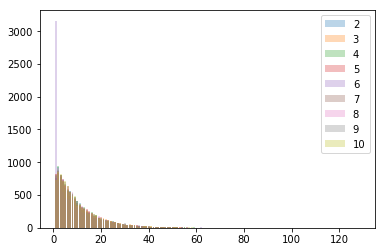

In [910]:
for x in xrange(2,11):
    labels, values = zip(*counts_per_choice[x].items())
    ## -1 drops the last list elements because we're dropping the '-1' case to plot specially
    plt.bar(labels[:-1], values[:-1], alpha=0.3, label=x)
    #print(counts_per_choice[x].items())
plt.legend()


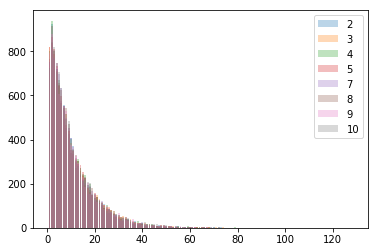

In [913]:
## Look at everything _but_ 6
for x in xrange(2,11):
    if x == 6:
        continue
    labels, values = zip(*counts_per_choice[x].items())
    ## -1 drops the last list elements because we're dropping the '-1' case to plot specially
    plt.bar(labels[:-1], values[:-1], alpha=0.3, label=x)
    #print(counts_per_choice[x].items())
plt.legend()


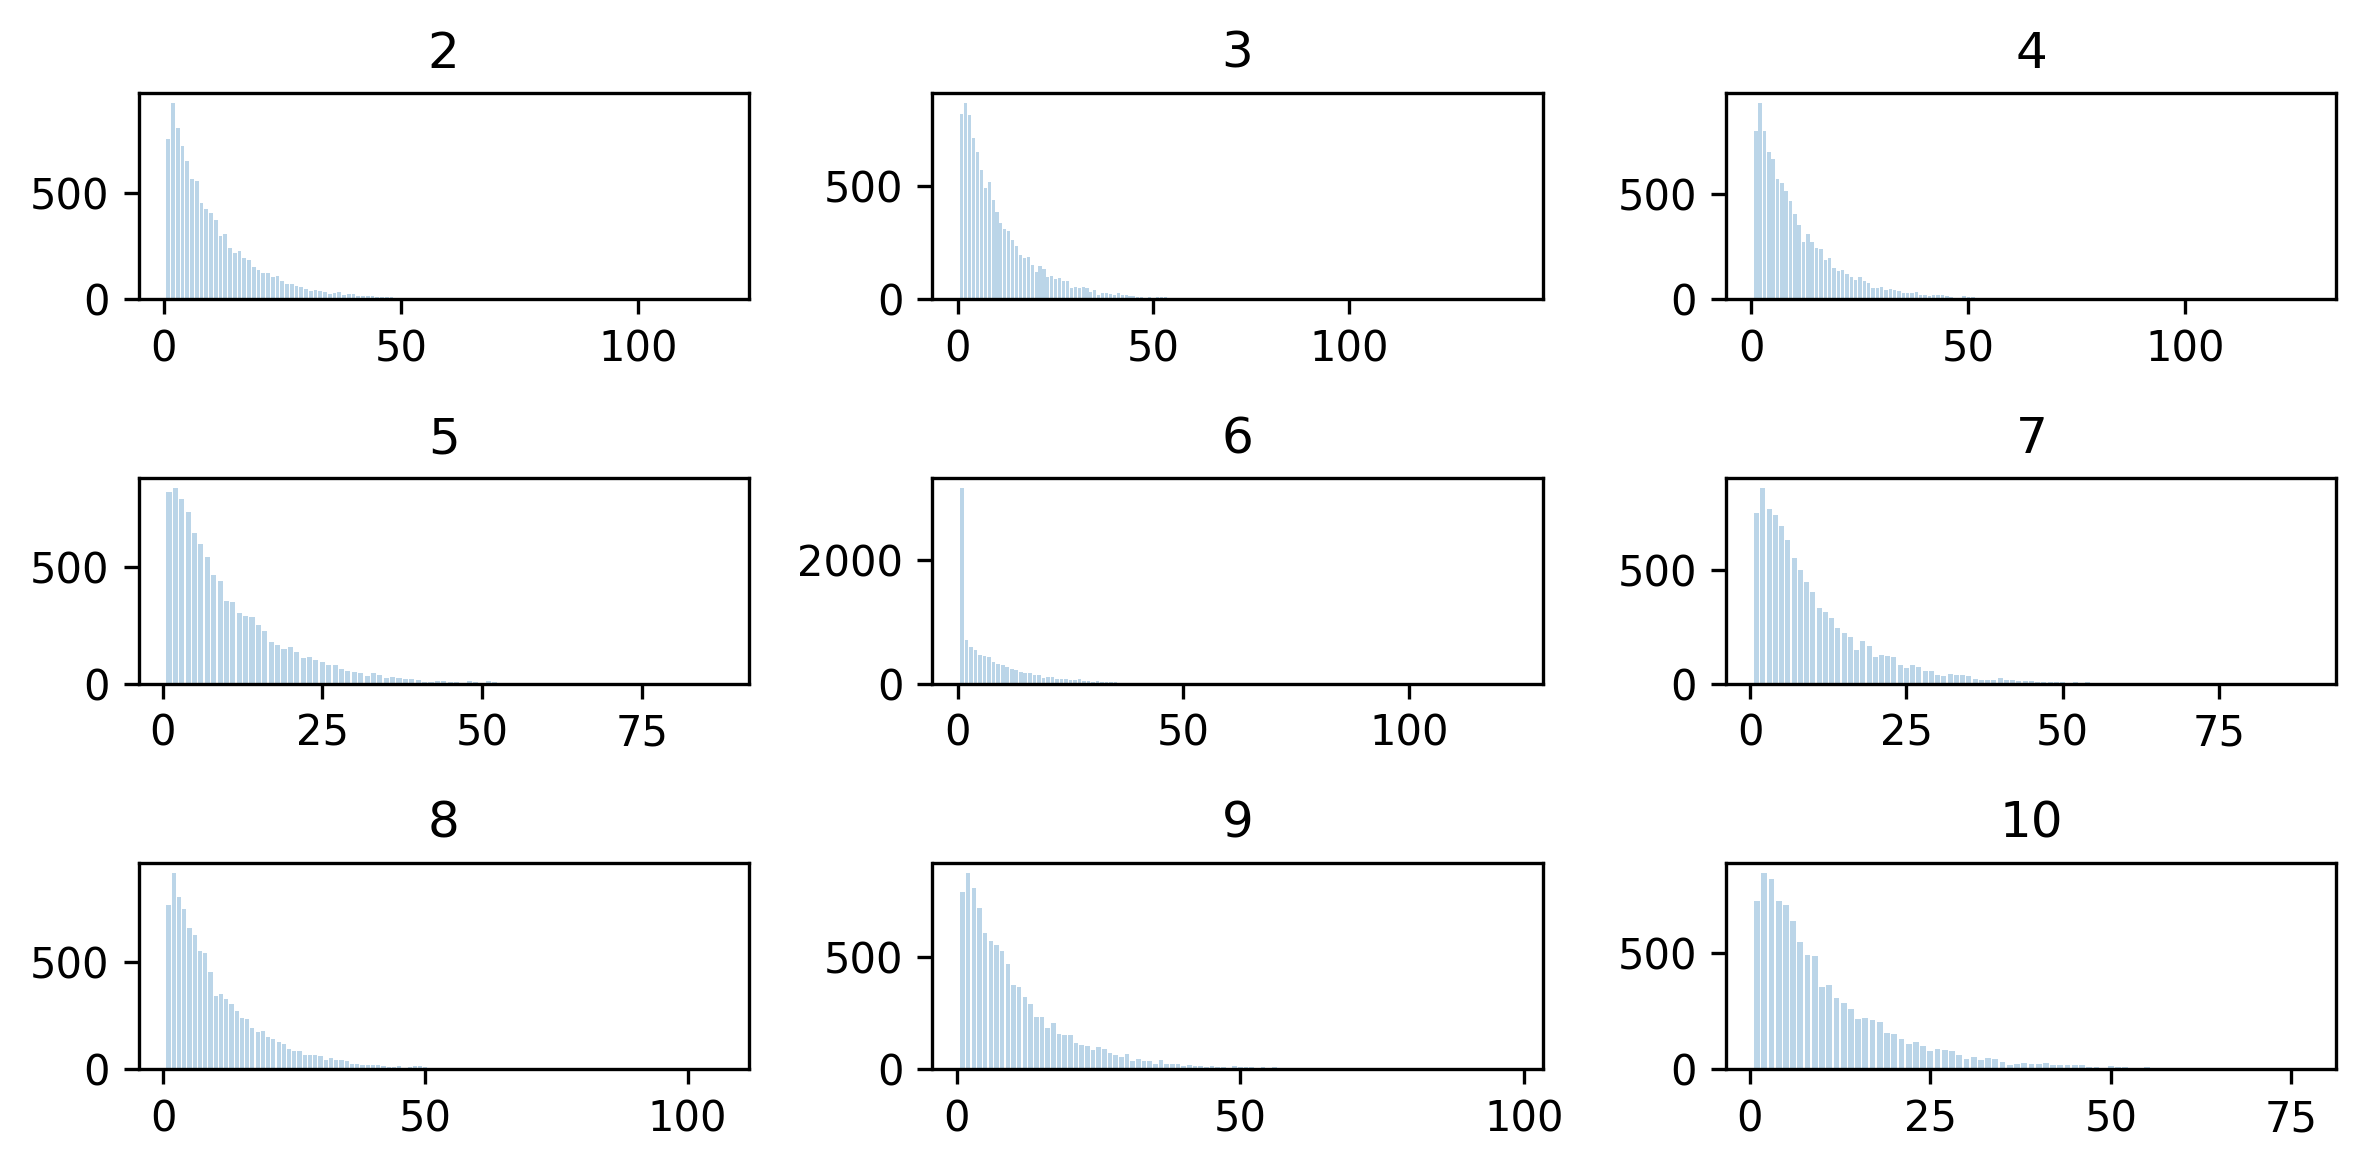

In [924]:
## Look at each individually
f, axarr = plt.subplots(3, 3, figsize=(8,4), dpi=300)
axarr = [a for b in axarr for a in b]
for x, ax in zip(xrange(2, 11), axarr):
    labels, values = zip(*counts_per_choice[x].items())
    ax.bar(labels, values, alpha=0.3, label=x)
    ax.set_title(x)
plt.tight_layout()


In [904]:
play_one_round_infinite(quiet=False)

Deck [9, 5, 5, 5, 7, 6, 8, 1, 8, 5, 5, 10, 5, 5, 4, 1, 8, 5, 10, 1, 1, 5, 9, 8, 1, 7, 5, 5, 5, 5, 2, 7, 4, 5, 10, 5, 10, 7, 1, 5, 7, 5, 10, 1, 5, 5, 4, 5, 4, 9, 8, 5, 8, 3, 8, 7, 5, 9, 1, 8, 10, 3, 5, 2, 5, 5, 5, 5, 9, 6, 10, 5, 3, 1, 5, 3, 5, 7, 5, 1, 2, 6, 9, 7, 5, 1, 2, 10, 6, 5, 2, 4, 6, 2, 5, 5, 6, 8, 4, 6, 3, 5, 2, 5, 5, 6, 5, 5, 2, 5, 5, 3, 10, 9, 5, 2, 9, 8, 3, 10, 2, 4, 5, 6, 5, 5, 1, 9, 2, 5, 5, 10, 8, 7, 3, 5, 4, 5, 4, 8, 3, 3, 1, 9, 6, 8, 6, 4, 2, 6, 10, 5, 5, 6, 4, 3, 4, 3, 5, 7, 9, 10, 9, 7, 4, 3, 1, 4, 5, 5, 8, 1, 10, 4, 4, 5, 2, 7, 5, 5, 4, 9, 7, 2, 5, 6, 8, 5, 6, 1, 8, 5, 2, 5, 5, 7, 9, 2, 5, 4, 1, 8, 7, 10, 9, 5, 3, 3, 7, 7, 8, 1, 2, 9, 3, 5, 5, 5, 6, 2, 6, 1, 5, 5, 7, 6, 5, 8, 10, 9, 8, 1, 10, 2, 5, 7, 10, 5, 10, 3, 3, 5, 5, 5, 3, 9, 5, 3, 5, 10, 6, 4, 4, 9, 6, 9, 5, 5, 7, 2]
player chose 5
[9, 5, 5, 5, 7, 6, 8, 1, 8, 5, 5, 10, 5, 5, 4, 1, 8, 5, 10, 1, 1, 5, 9, 8, 1, 7, 5, 5, 5, 5, 2, 7, 4, 5, 10, 5, 10, 7, 1, 5, 7, 5, 10, 1, 5, 5, 4, 5, 4, 9, 8, 5, 8, 3, 8, 7, 5, 9,

(1, 0, 11)